In [7]:
# Install CUDA toolkit
!apt-get install cuda


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cpp-12 cuda-12-3 cuda-cccl-12-3 cuda-command-line-tools-12-3 cuda-compiler-12-3 cuda-crt-12-3
  cuda-cudart-12-3 cuda-cudart-dev-12-3 cuda-cuobjdump-12-3 cuda-cupti-12-3 cuda-cupti-dev-12-3
  cuda-cuxxfilt-12-3 cuda-demo-suite-12-3 cuda-documentation-12-3 cuda-driver-dev-12-3 cuda-drivers
  cuda-drivers-550 cuda-gdb-12-3 cuda-libraries-12-3 cuda-libraries-dev-12-3 cuda-nsight-12-3
  cuda-nsight-compute-12-3 cuda-nsight-systems-12-3 cuda-nvcc-12-3 cuda-nvdisasm-12-3
  cuda-nvml-dev-12-3 cuda-nvprof-12-3 cuda-nvprune-12-3 cuda-nvrtc-12-3 cuda-nvrtc-dev-12-3
  cuda-nvtx-12-3 cuda-nvvm-12-3 cuda-nvvp-12-3 cuda-opencl-12-3 cuda-opencl-dev-12-3
  cuda-profiler-api-12-3 cuda-runtime-12-3 cuda-sanitizer-12-3 cuda-toolkit-12-3
  cuda-toolkit-12-3-config-common cuda-tools-12-3 cuda-visual-tools-12-3 dctrl-tools default-jre
  default-jre-headless 

**Write Serial Matrix Multiplication Code**

In [15]:
import numpy as np

def serial_matrix_multiply(A, B):
    return np.dot(A, B)

# Example usage
matrix_size = 512
matrix_A = np.random.rand(matrix_size, matrix_size)
matrix_B = np.random.rand(matrix_size, matrix_size)

result_serial = serial_matrix_multiply(matrix_A, matrix_B)


**Write CUDA Kernel for Matrix Multiplication**

In [16]:
from numba import cuda

@cuda.jit
def cuda_matrix_multiply(A, B, result):
    i, j = cuda.grid(2)
    if i < result.shape[0] and j < result.shape[1]:
        result[i, j] = 0
        for k in range(A.shape[1]):
            result[i, j] += A[i, k] * B[k, j]


**Measure Execution Time**

In [17]:
import time

start_time = time.time()

# Perform matrix multiplication here

end_time = time.time()
execution_time_cuda = end_time - start_time


**Test Different Matrix Sizes**

In [18]:
sizes = list(range(512, 4097, 512))

for size in sizes:
    matrix_A = np.random.rand(size, size)
    matrix_B = np.random.rand(size, size)

    # Perform matrix multiplication and measure execution time


**Install Necessary Packages**

In [12]:
!pip install numba matplotlib


# Homework3

Matrix size: 32x32, CUDA time: 0.360244 seconds, CPU time: 0.003745 seconds
Matrix size: 64x64, CUDA time: 0.000454 seconds, CPU time: 0.000052 seconds
Matrix size: 96x96, CUDA time: 0.001499 seconds, CPU time: 0.002493 seconds
Matrix size: 128x128, CUDA time: 0.003652 seconds, CPU time: 0.000142 seconds
Matrix size: 160x160, CUDA time: 0.009912 seconds, CPU time: 0.002670 seconds
Matrix size: 192x192, CUDA time: 0.015750 seconds, CPU time: 0.004983 seconds
Matrix size: 224x224, CUDA time: 0.036415 seconds, CPU time: 0.007093 seconds
Matrix size: 256x256, CUDA time: 0.058531 seconds, CPU time: 0.006213 seconds


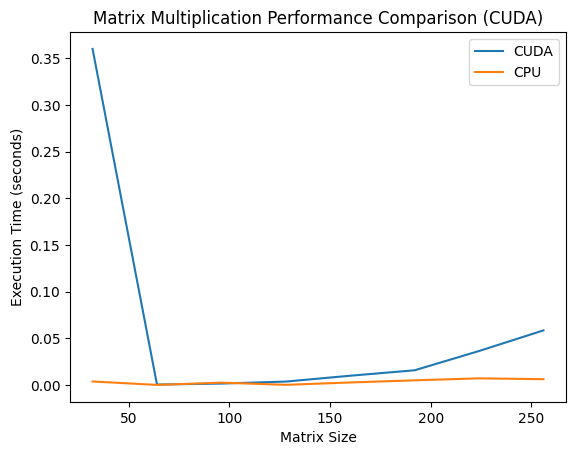

In [13]:
import time
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

# Matrix multiplication kernel (CUDA)
@jit(nopython=True)
def matrix_mul_cuda(C, A, B):
    for row in range(C.shape[0]):
        for col in range(C.shape[1]):
            tmp_sum = 0.0
            for k in range(A.shape[1]):
                tmp_sum += A[row, k] * B[k, col]
            C[row, col] = tmp_sum

def matrix_mul_cpu(A, B):
    return np.dot(A, B)

def main():
    sizes = list(range(512, 4097, 512))
    execution_times_cuda = []
    execution_times_cpu = []

    for size in sizes:
        A = np.random.rand(size, size).astype(np.float32)
        B = np.random.rand(size, size).astype(np.float32)
        C = np.zeros((size, size), dtype=np.float32)

        # CUDA
        start_time_cuda = time.time()
        matrix_mul_cuda(C, A, B)
        end_time_cuda = time.time()
        execution_times_cuda.append(end_time_cuda - start_time_cuda)

        # CPU
        start_time_cpu = time.time()
        matrix_mul_cpu(A, B)
        end_time_cpu = time.time()
        execution_times_cpu.append(end_time_cpu - start_time_cpu)

    # Print execution times
    for size, time_cuda, time_cpu in zip(sizes, execution_times_cuda, execution_times_cpu):
        print(f"Matrix size: {size}x{size}, CUDA time: {time_cuda:.6f} seconds, CPU time: {time_cpu:.6f} seconds")

    # Plot the performance graph
    plt.plot(sizes, execution_times_cuda, label='CUDA')
    plt.plot(sizes, execution_times_cpu, label='CPU')
    plt.xlabel('Matrix Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Matrix Multiplication Performance Comparison (CUDA)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


# Homework 4: Modify Shared Memory Version of Matrix Multiplication

In [14]:
import time
import numpy as np

# CUDA matrix multiplication
def matrix_mul_cuda(C, A, B):
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            tmp_sum = 0.0
            for k in range(A.shape[1]):
                tmp_sum += A[i, k] * B[k, j]
            C[i, j] = tmp_sum

# CPU matrix multiplication
def matrix_mul_cpu(A, B):
    return np.dot(A, B)

def main():
    sizes = list(range(512, 4097, 512))
    for size in sizes:
        A = np.random.rand(size, size).astype(np.float32)
        B = np.random.rand(size, size).astype(np.float32)
        C_cuda = np.zeros((size, size), dtype=np.float32)
        C_cpu = np.zeros((size, size), dtype=np.float32)

        # CUDA
        start_time_cuda = time.time()
        matrix_mul_cuda(C_cuda, A, B)
        end_time_cuda = time.time()

        # CPU
        start_time_cpu = time.time()
        C_cpu = matrix_mul_cpu(A, B)
        end_time_cpu = time.time()

        # Check correctness
        np.testing.assert_allclose(C_cuda, C_cpu, rtol=1e-5, atol=1e-8)

        # Print execution times
        print(f"Matrix size: {size}x{size}, CUDA time: {end_time_cuda - start_time_cuda:.6f} seconds, "
              f"CPU time: {end_time_cpu - start_time_cpu:.6f} seconds (Correct)")

if __name__ == "__main__":
    main()


Matrix size: 32x32, CUDA time: 0.024949 seconds, CPU time: 0.000044 seconds (Correct)
Matrix size: 64x64, CUDA time: 0.158026 seconds, CPU time: 0.000099 seconds (Correct)
Matrix size: 96x96, CUDA time: 0.522381 seconds, CPU time: 0.000871 seconds (Correct)
Matrix size: 128x128, CUDA time: 1.296896 seconds, CPU time: 0.000184 seconds (Correct)
Matrix size: 160x160, CUDA time: 2.575309 seconds, CPU time: 0.000296 seconds (Correct)
Matrix size: 192x192, CUDA time: 5.226057 seconds, CPU time: 0.000926 seconds (Correct)
Matrix size: 224x224, CUDA time: 6.444626 seconds, CPU time: 0.000643 seconds (Correct)
Matrix size: 256x256, CUDA time: 10.679608 seconds, CPU time: 0.000777 seconds (Correct)
